# Updates on Regression Error Characteristics Curve

## Introduction

###  In machine learning, a Receiver Operating Characteristic (ROC) curve visualizes the performance of a classifier applied on a binary class problem across all possible trade-offs between the false positive rates and the true positive rates. A graph consists of multiple ROC curves of different models characterizes the performance of the models on a binary problem and makes the comparison process of the models easier by visualization. Additionally, the area under the ROC curve (AUC) represents the expected performance of the classification model as a single scalar value. 

### Although ROC curves are limited to classification problems, Regression Error Characteristic (REC) curves can be used to visualize the performance of the regressor models. REC illustrates the absolute deviation tolerance versus the fraction of the exemplars predicted correctly within the tolerance interval. The resulting curve estimates the cumulative distribution function of the error. The area over the REC curve (AOC), which can be calculated via the area under the REC curve (AOC = 1 - AUC) is a biased estimate of the expected error.

### Furthermore, the coefficient of determination $R^2$ can be also calculated with respect to the AOC. Likewise the ROC curve, the shape of the REC curve can also be used as a guidance for the users to reveal additional information about the data modeling. The REC curve was implemented in Python.

### Previously, I have implemented a simple version of REC [LINK](https://amirhessam88.github.io/regression-error-characteristics-curve/). Here, is an overview of the objected oriented implementation of REC and its updates.

### You can clone the project from my GitHub Repo [LINK](https://github.com/amirhessam88/Regression-Error-Characteristic-Curve) or run the following cell.

In [2]:
# cloning the project
!git clone https://github.com/amirhessam88/Regression-Error-Characteristic-Curve.git

# change directory to the project
%cd Regression-Error-Characteristic-Curve

# installing requirements
!pip install -r requirements.txt

### Or you can follow the class below which is the content of `src/rec.py`

In [1]:
# Loading Packages
import numpy as np
import scipy as scp
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
# class definition
class RegressionErrorCharacteristic:
    """Regression Error Characteristics (REC).
    This is wrapper to implement the REC algorithm.
    REC is implemented based on the following paper:
    Bi, J., & Bennett, K. P. (2003). Regression error characteristic curves.
    In Proceedings of the 20th international conference on machine learning (ICML-03) (pp. 43-50).
    https://www.aaai.org/Papers/ICML/2003/ICML03-009.pdf
    Parameters
    ----------
    y_true: numpy.array[int] or list[float]
        List of ground truth target (response) values
    y_pred: numpy.array[float] or list[float]
        List of predicted target values list[float]
    Attributes
    ----------
    auc_rec: float value between 0. and 1
        Area under REC curve.
    deviation:  numpy.array[float] or list[float]
        List of deviations to plot REC curve.
    accuracy:  numpy.array[float] or list[float]
        Calculated accuracy at each deviation to plot REC curve.
    plotting_dict: dict()
        Plotting object as a dictionary consists of all
        calculated metrics which was used to plot curves
    plot_rec(): Func
        Function to plot the REC curve.
    """

    def __init__(self, y_true, y_pred):
        if not isinstance(y_true, np.ndarray):
            self.y_true = np.array(y_true)
        else:
            self.y_true = y_true
        if not isinstance(y_pred, np.ndarray):
            self.y_pred = np.array(y_pred)
        else:
            self.y_pred = y_pred
        self.deviation, self.accuracy, self.auc_rec = self._rec_curve()

    def _rec_curve(self):
        """
        Function to calculate the rec curve elements: deviation, accuracy, auc.
        Simpson method is used as the integral method to calculate the area under
        regression error characteristics (REC).
        REC is implemented based on the following paper:
        Bi, J., & Bennett, K. P. (2003). Regression error characteristic curves.
        In Proceedings of the 20th international conference on machine learning (ICML-03) (pp. 43-50).
        https://www.aaai.org/Papers/ICML/2003/ICML03-009.pdf
        """
        begin = 0.0
        end = 1.0
        interval = 0.01
        accuracy = []
        deviation = np.arange(begin, end, interval)

        # main loop to calculate norm and compare with each deviation
        for i in range(len(deviation)):
            count = 0.0
            for j in range(len(self.y_true)):
                calc_norm = np.linalg.norm(self.y_true[j] - self.y_pred[j]) / np.sqrt(
                    np.linalg.norm(self.y_true[j]) ** 2
                    + np.linalg.norm(self.y_pred[j]) ** 2
                )
                if calc_norm < deviation[i]:
                    count += 1
            accuracy.append(count / len(self.y_true))

        auc_rec = scp.integrate.simps(accuracy, deviation) / end

        return deviation, accuracy, auc_rec

    def plot_rec(self, figsize=None, color=None, linestyle=None, fontsize=None):
        """Function to plot REC curve.
        Parameters
        ----------
        figsize: tuple, optional, (default=(8, 5))
            Figure size
        color: str, optional, (default="navy")
            Color of the curve.
        linestyle: str, optional, (default="--")
        fontsize: int or float, optional, (default=15)
            Fontsize for xlabel and ylabel, and ticks parameters
        """
        sns.set_style("ticks")
        mpl.rcParams["axes.linewidth"] = 3
        mpl.rcParams["lines.linewidth"] = 3

        # initializing figsize
        if figsize is None:
            figsize = (8, 5)
        elif isinstance(figsize, list) or isinstance(figsize, tuple):
            figsize = figsize
        else:
            raise TypeError("Only tuple and list types are allowed for figsize.")

        # initializing color
        if color is None:
            color = "navy"
        elif isinstance(color, str):
            color = color
        else:
            raise TypeError("Only str type is allowed for color.")

        # initializing linestyle
        if linestyle is None:
            linestyle = "--"
        elif isinstance(linestyle, str):
            linestyle = linestyle
        else:
            raise TypeError("Only str type is allowed for linestyle.")

        # initializing fontsize
        if fontsize is None:
            fontsize = 15
        elif isinstance(fontsize, float) or isinstance(fontsize, int):
            fontsize = fontsize
        else:
            raise TypeError("Only int and float types are allowed for fontsize.")

        fig, ax = plt.subplots(figsize=figsize)

        ax.plot(
            self.deviation,
            self.accuracy,
            color=color,
            linestyle=linestyle,
            label=f"AUC = {self.auc_rec:.3f}",
        )

        ax.set(
            xlim=[-0.01, 1.01],
            ylim=[-0.01, 1.01],
        )
        ax.set_xlabel("Deviation", fontsize=fontsize)
        ax.set_ylabel("Accuracy", fontsize=fontsize)
        ax.set_title("REC Curve", fontsize=fontsize)

        ax.tick_params(axis="both", which="major", labelsize=14)
        ax.legend(prop={"size": fontsize}, loc=4, framealpha=0.0)

        plt.show()

### Load Data and Train a Regression Model

In [2]:
# load data, train model
from sklearn import linear_model, datasets
from sklearn.model_selection import cross_val_predict

# loading a sample regression dataset
boston = datasets.load_boston()
X = boston.data
y_true = boston.target

# defining a simple linear regression model
model = linear_model.LinearRegression()

# predicting using 4-folds cross-validation
y_pred = cross_val_predict(model, X, y_true, cv=4)

### Let's try to plot REC curve

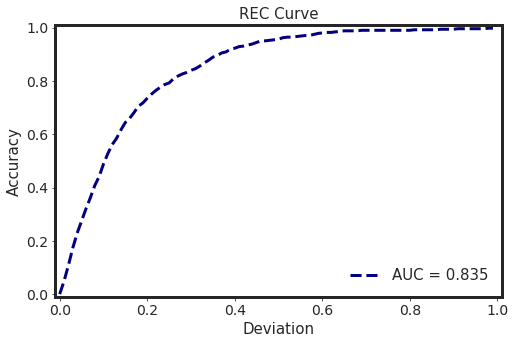

In [7]:
# initiate the RegressionErrorCharacteristic with y_pred and y_true
myREC = RegressionErrorCharacteristic(y_true, y_pred)

# now we can use the class function plot_rec()
myREC.plot_rec()

### Currently, REC is also implemented in my Machine Learning Python Library, [SlickML](https://github.com/slickml/slick-ml) which can be easily installed via pip.

In [4]:
!pip install slickml

,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,0.499000,0.509000,4.646000,42.299000,None,0.254000,0.835000,0.342000,1.110000


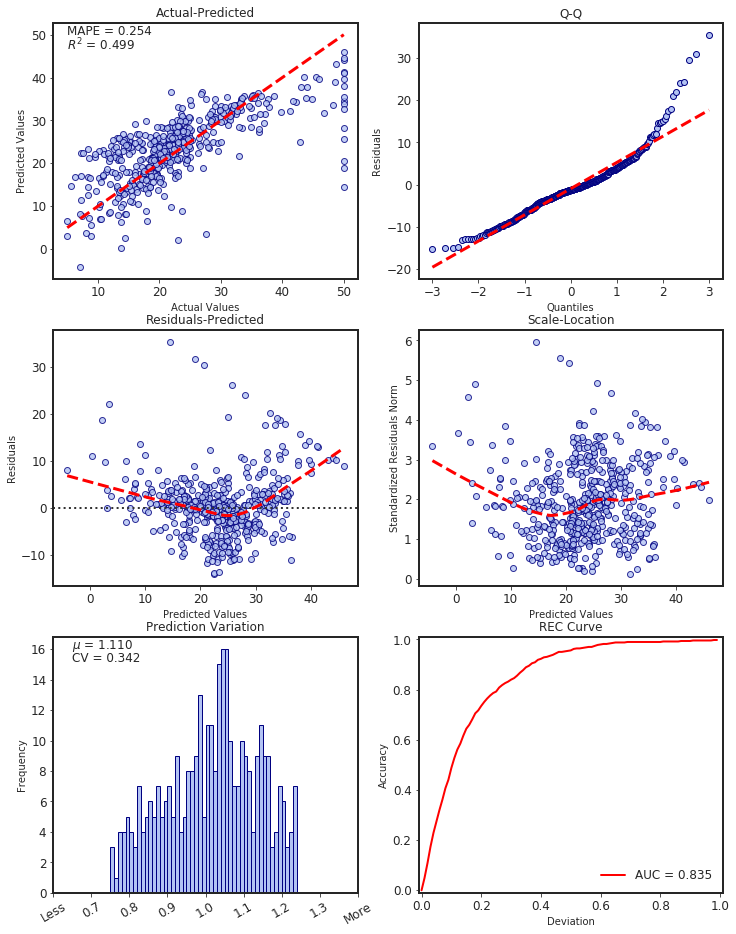

In [3]:
# plot regression metrics
from slickml.metrics import RegressionMetrics
reg_metrics = RegressionMetrics(y_true, y_pred)
reg_metrics.plot()

### Extra notes about the REC class

In [15]:
# list of attributes of the REC object
dir(myREC)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_rec_curve',
 'accuracy',
 'auc_rec',
 'deviation',
 'plot_rec',
 'y_pred',
 'y_true']

In [16]:
# dict of attributes values of the REC object
myREC.__dict__

{'y_true': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
        19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
        20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
        23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
        33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
        21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
        20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
        23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
        15.6, 11.8, 13.8, 15